In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('SO_age_with_regions_part3.csv')

In [3]:
data.shape

(44823, 46)

In [4]:
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,YearsCode,YearsCodePro,years_to_pro,age_serious_code,total_types,...,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,began_dev_agegroup,ConvertedComp,JobSat,NEWLearn,region
0,4,I am a developer by profession,Yes,25.0,18,7.0,4.0,3.0,18.0,0,...,0,0,0,0,0,below 20 years,NaN,Slightly dissatisfied,Once a year,Europe
1,5,"I used to be a developer by profession, but no...",Yes,31.0,16,15.0,8.0,7.0,16.0,0,...,0,0,0,0,0,below 20 years,NaN,NaN,Once a year,Northern America
2,8,I am a developer by profession,Yes,36.0,12,17.0,13.0,4.0,19.0,3,...,0,0,0,0,0,below 20 years,116000.0,Slightly dissatisfied,Once a year,Northern America
3,9,I am a developer by profession,No,30.0,20,6.0,4.0,2.0,24.0,1,...,0,0,0,0,0,In my Twenties,NaN,Very dissatisfied,Once a year,Africa
4,10,I am a developer by profession,Yes,22.0,14,8.0,4.0,4.0,14.0,3,...,0,0,0,0,0,below 20 years,32315.0,Very satisfied,Every few months,Europe


In [5]:
data['began_dev_agegroup'].unique()

array(['below 20 years', 'In my Twenties', 'In my Fourties',
       'In my Thirties', 'In my Fifties'], dtype=object)

## Some data cleaning and renaming of values

In [8]:
data['began_dev_agegroup'] = data['began_dev_agegroup'].replace({'below 20 years': 'Below 20' ,
                                                                 'In my Twenties': "In my 20s", 
                                                                 'In my Thirties': "In my 30s", 
                                                                 'In my Fourties': "In my 40s", 
                                                                 'In my Fifties': "Over 50"})

In [55]:
data['began_dev_agegroup'].value_counts(normalize=True)

Below 20     0.708810
In my 20s    0.251723
In my 30s    0.032238
In my 40s    0.005600
Over 50      0.001629
Name: began_dev_agegroup, dtype: float64

Convert the negative values in years_to_pro to positive (from part 2 file)

In [10]:
data['years_to_pro'] = np.abs(data['years_to_pro'])

Change the string values in 'Age1stCode' to numbers and then convert the column to float for analysis

In [11]:
data['Age1stCode'] = data['Age1stCode'].replace({'Younger than 5 years':3, 'Older than 85': 85})
data['Age1stCode'] = data['Age1stCode'].astype(float)

Create a new column that says 'Yes' if a person started active coding when over 30 years old or 'No' otherwise

In [12]:
data['started_over_30'] = ''
data.loc[(data['age_serious_code'] < 30), 'started_over_30'] = 'No'
data.loc[(data['age_serious_code'] >= 30), 'started_over_30'] = 'Yes'

In [14]:
data['Gender'].unique()

array(['Man', 'Woman', nan,
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

Change all the values in 'Gender' column that are not 'man', 'woman' or NaN to 'non-conforming

In [15]:
data.loc[(data['Gender'] != 'Man') & (data['Gender'] != 'Woman') & (data['Gender'].notna()), 'Gender'] = 'non-conforming'

In [16]:
data['Gender'].unique()

array(['Man', 'Woman', nan, 'non-conforming'], dtype=object)

Set the color palette

In [17]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [18]:
sns.set_palette('bright')

### Age of active coding by age-group

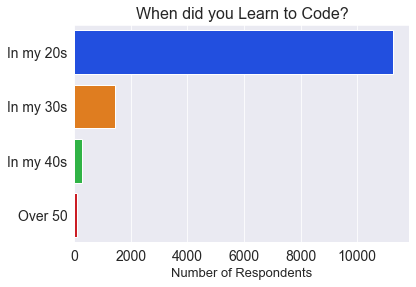

In [19]:
sns.countplot(y = 'began_dev_agegroup', data=data[data['began_dev_agegroup'] != 'Below 20'], order=['In my 20s', "In my 30s", 
                                                                 "In my 40s", 'Over 50'])
plt.ylabel('')
plt.yticks(FontSize=14)
plt.xticks(FontSize=14)
plt.xlabel('Number of Respondents', FontSize=13)
plt.title('When did you Learn to Code?', FontSize=16)
plt.show()

In [20]:
sns.set_palette('icefire')
sns.set_style('darkgrid')

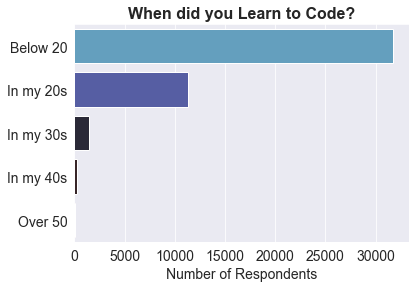

In [21]:
sns.countplot(y = 'began_dev_agegroup', data=data, order=['Below 20','In my 20s', "In my 30s", "In my 40s", 'Over 50'])
plt.ylabel('')
plt.yticks(FontSize=14)
plt.xticks(FontSize=14)
plt.xlabel('Number of Respondents', FontSize=14)
plt.title('When did you Learn to Code?', FontSize=16, fontweight='bold')
plt.show()

## EDA for age_serious_code and 'started_over_30' and their interactions with other features

In [22]:
data[data['age_serious_code'] >= 30].shape

(1769, 47)

In [23]:
data[data['age_serious_code'] < 30].shape

(43054, 47)

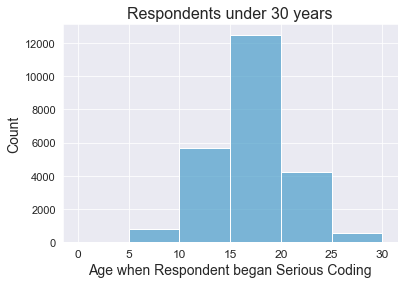

In [26]:
sns.histplot(data[data['Age'] < 30], x = 'age_serious_code', bins=[0,5, 10, 15, 20, 25, 30])
plt.xticks(FontSize=12)
plt.yticks(FontSize=11)
plt.xlabel("Age when Respondent began Serious Coding" ,FontSize=14)
plt.ylabel('Count', FontSize=14)
plt.title('Respondents under 30 years', FontSize=16)
plt.show()

In [27]:
data.describe()

,Respondent,Age,Age1stCode,YearsCode,YearsCodePro,years_to_pro,age_serious_code,total_types,"Developer, desktop or enterprise applications","Developer, full-stack",...,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,ConvertedComp
count,44823.000000,44823.000000,44823.000000,44823.000000,36473.000000,36473.000000,44823.000000,44823.000000,44823.000000,44823.000000,...,44823.000000,44823.000000,44823.000000,44823.000000,44823.000000,44823.000000,44823.000000,44823.000000,44823.000000,3.025900e+04
mean,29006.106999,30.760815,15.259643,12.944404,8.573328,5.821635,17.816411,2.753631,0.208174,0.482498,...,0.047253,0.043884,0.067443,0.058586,0.067242,0.036454,0.021931,0.034224,0.010084,1.029112e+05
std,18654.403899,9.313502,4.990085,9.553755,7.753552,4.313731,5.810584,2.400026,0.406007,0.499699,...,0.212181,0.204839,0.250791,0.234851,0.250444,0.187420,0.146459,0.181805,0.099913,2.235285e+05
min,4.000000,11.000000,3.000000,0.500000,0.500000,0.000000,5.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,13151.500000,24.000000,12.000000,6.000000,3.000000,3.000000,14.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.594400e+04
50%,26286.000000,29.000000,15.000000,10.000000,6.000000,5.000000,17.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.404900e+04
75%,47522.500000,35.000000,18.000000,18.000000,12.000000,8.000000,20.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000e+04
max,65629.000000,74.000000,85.000000,50.500000,50.500000,40.000000,71.500000,23.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+06


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44823 entries, 0 to 44822
Data columns (total 47 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Respondent                                     44823 non-null  int64  
 1   MainBranch                                     44748 non-null  object 
 2   Hobbyist                                       44823 non-null  object 
 3   Age                                            44823 non-null  float64
 4   Age1stCode                                     44823 non-null  float64
 5   YearsCode                                      44823 non-null  float64
 6   YearsCodePro                                   36473 non-null  float64
 7   years_to_pro                                   36473 non-null  float64
 8   age_serious_code                               44823 non-null  float64
 9   total_types                                    448

In [55]:
data['started_over_30'].value_counts(normalize=True)

No     0.960534
Yes    0.039466
Name: started_over_30, dtype: float64

### Distribution of 'started_over_30' with numeric features

In [30]:
sns.set_palette(['yellow','#A7226E'])

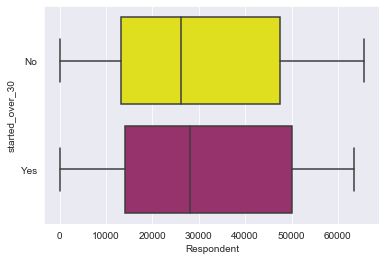

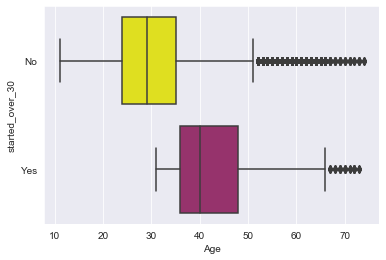

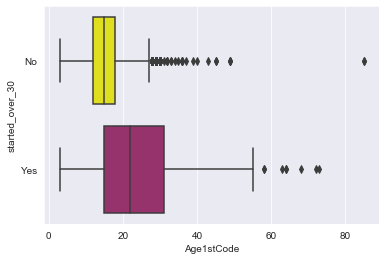

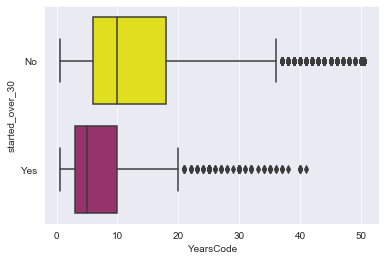

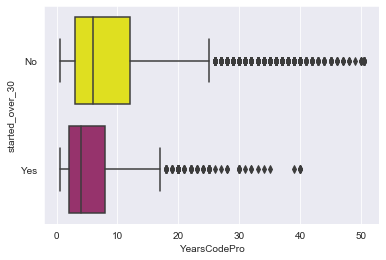

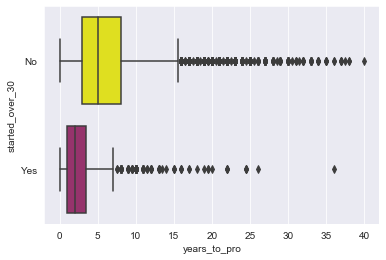

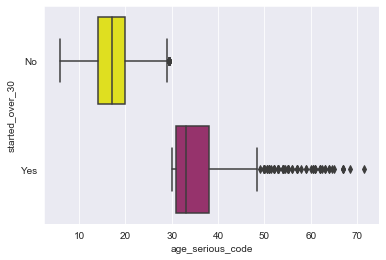

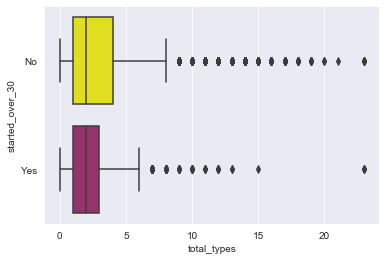

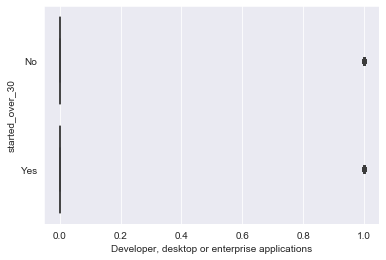

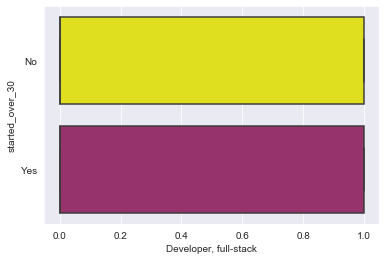

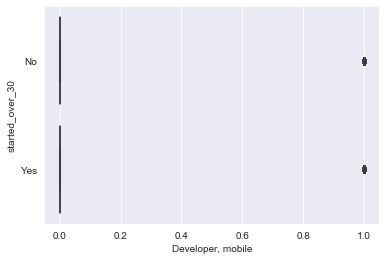

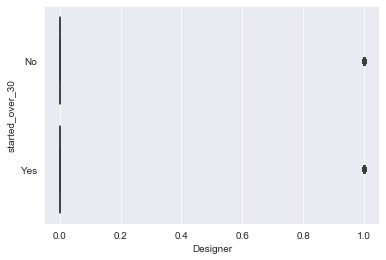

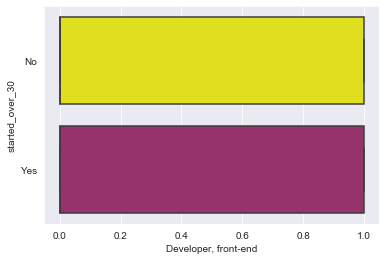

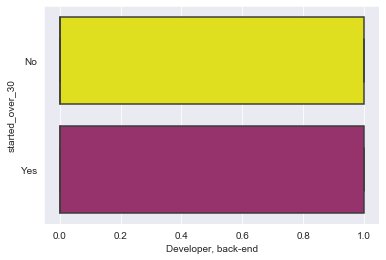

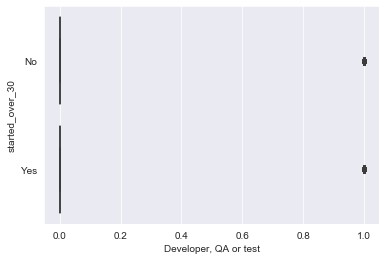

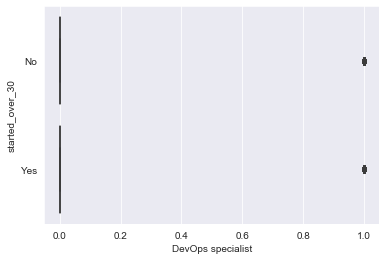

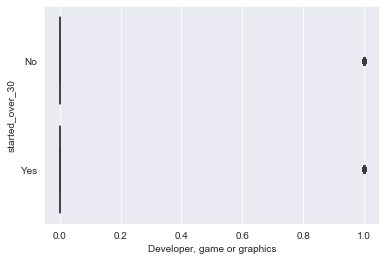

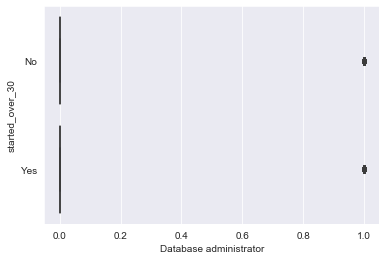

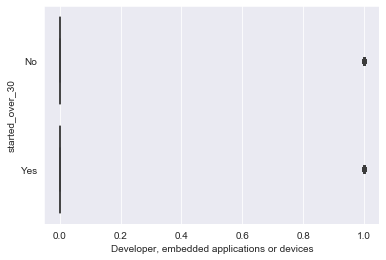

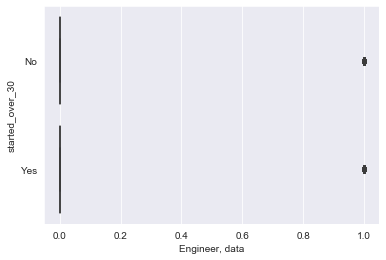

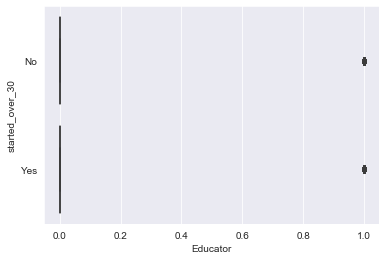

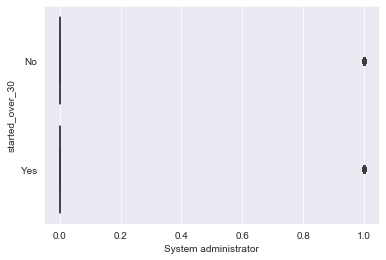

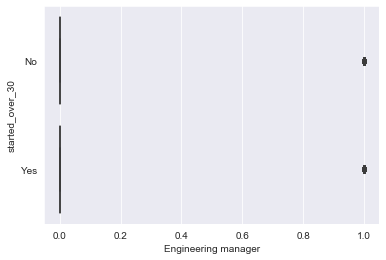

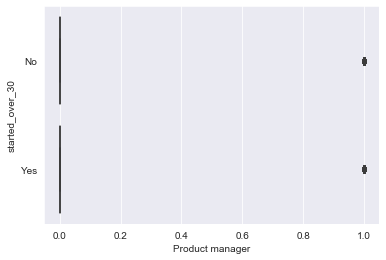

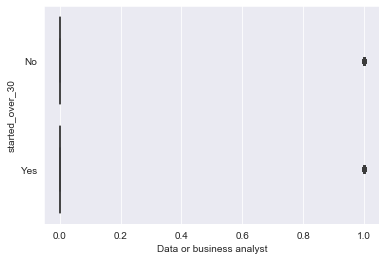

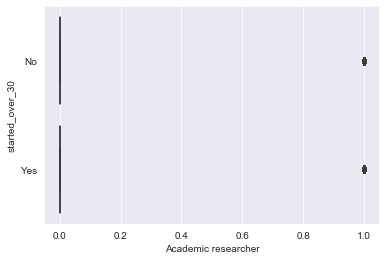

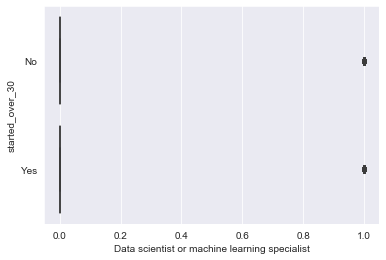

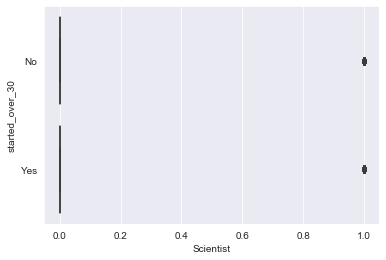

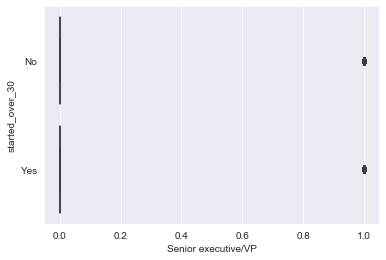

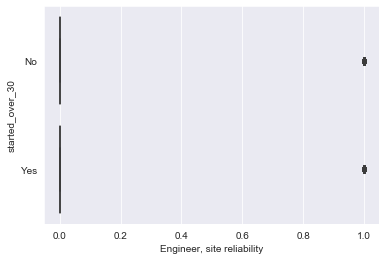

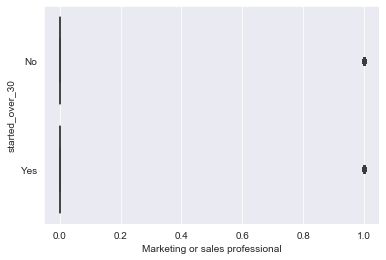

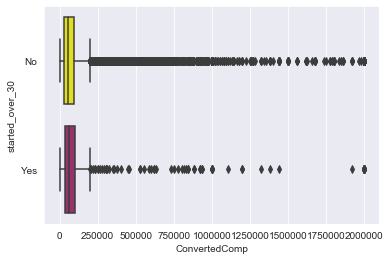

In [31]:
for col in data.select_dtypes(exclude='object'):
    sns.boxplot(y = data['started_over_30'], x = col, data=data)
    plt.show()

### Caategorical features

In [32]:
data.describe(include='object')

,MainBranch,Hobbyist,Country,Gender,DevType,Employment,Ethnicity,EdLevel,UndergradMajor,NEWPurpleLink,began_dev_agegroup,JobSat,NEWLearn,region,started_over_30
count,44748,44823,44823,44246,38661,44709,40793,43875,39188,44295,44823,35936,43231,44809,44823
unique,5,2,171,3,6897,7,170,9,12,4,5,5,4,7,2
top,I am a developer by profession,Yes,United States,Man,"Developer, full-stack",Employed full-time,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend",Below 20,Very satisfied,Once a year,Europe,No
freq,33947,35208,9453,40420,3382,32318,26721,20244,24333,23254,31771,11791,16181,18951,43054


### How 'started_over_30' changes with different categorical features

In [33]:
sns.set_palette('bright')

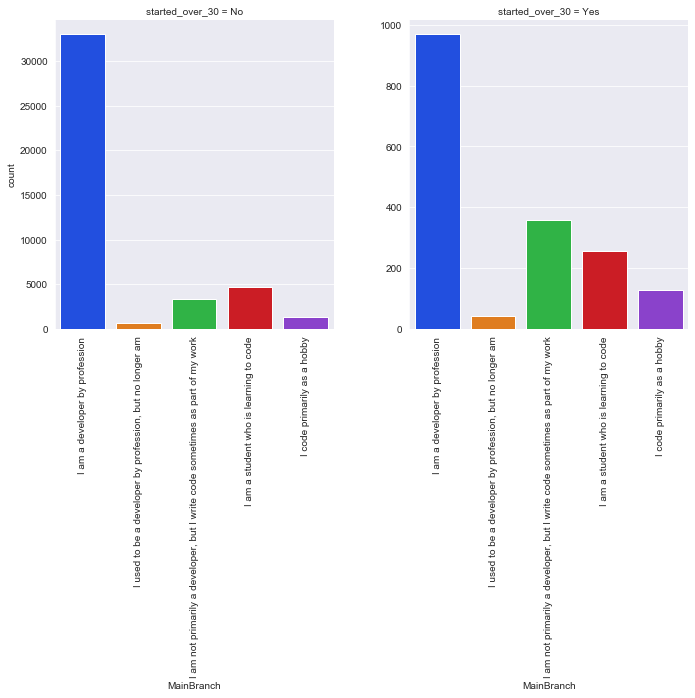

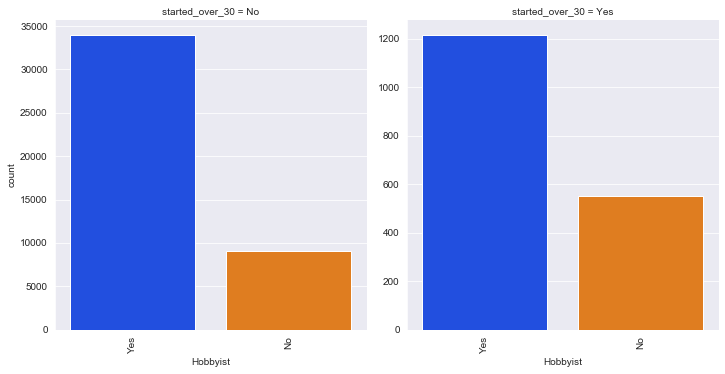

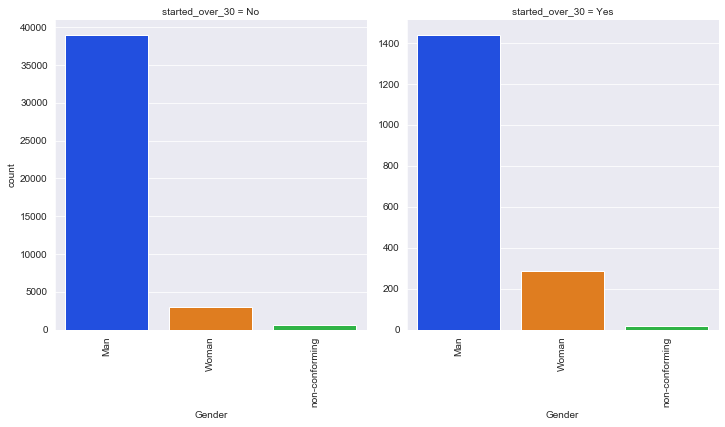

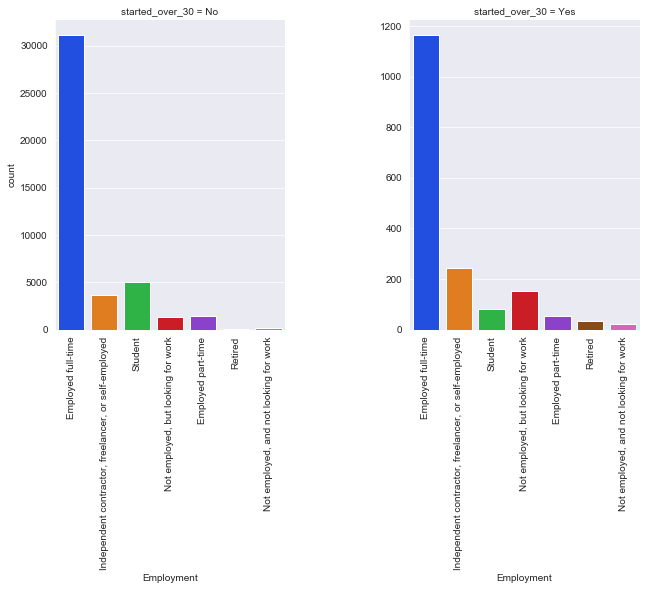

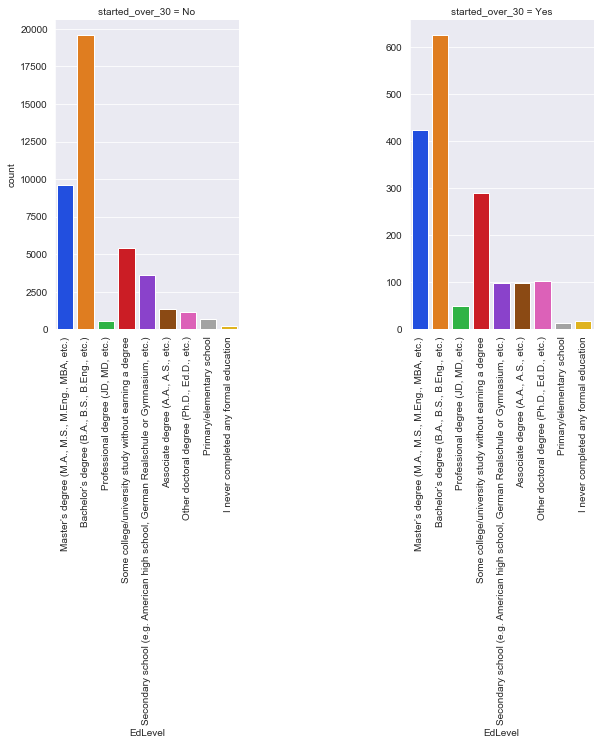

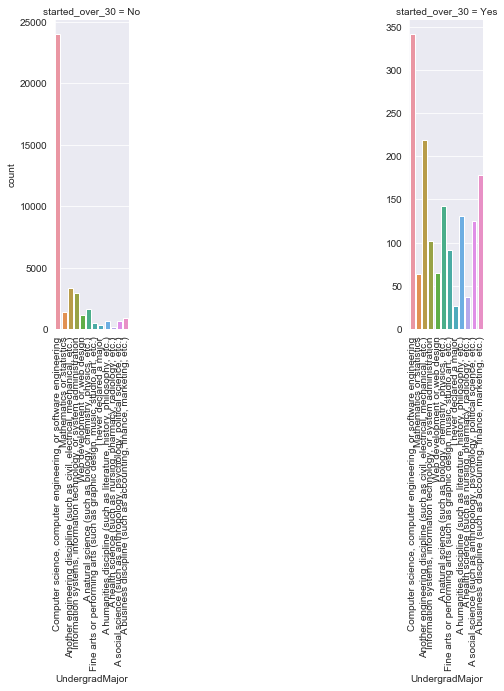

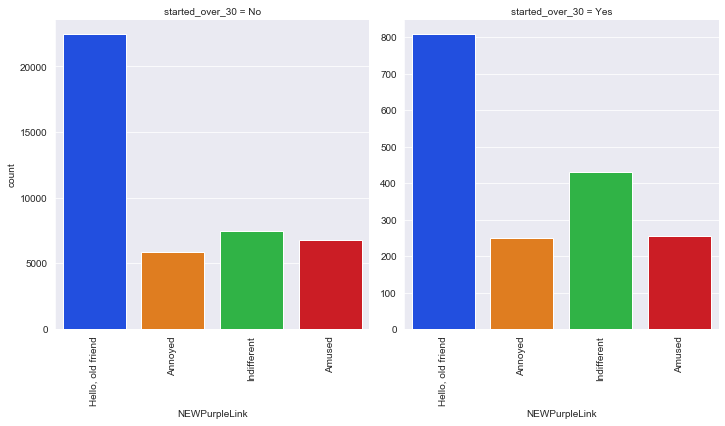

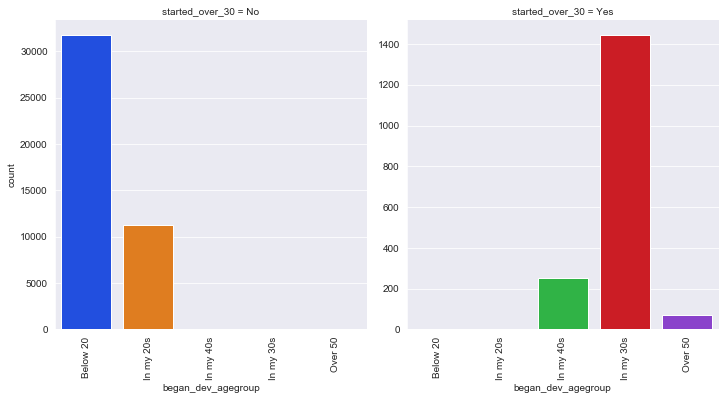

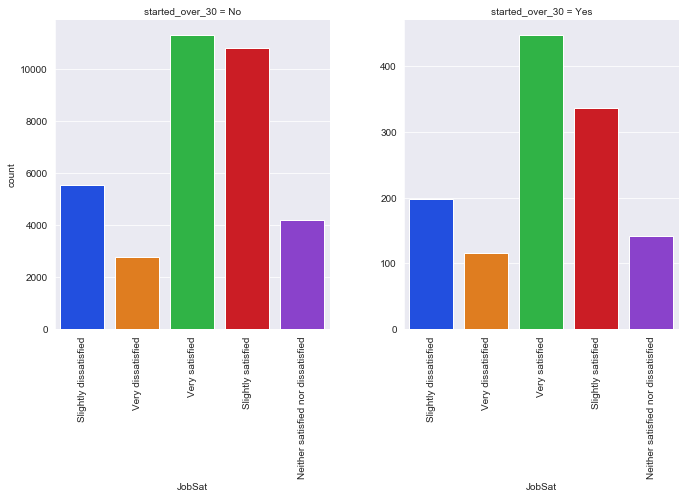

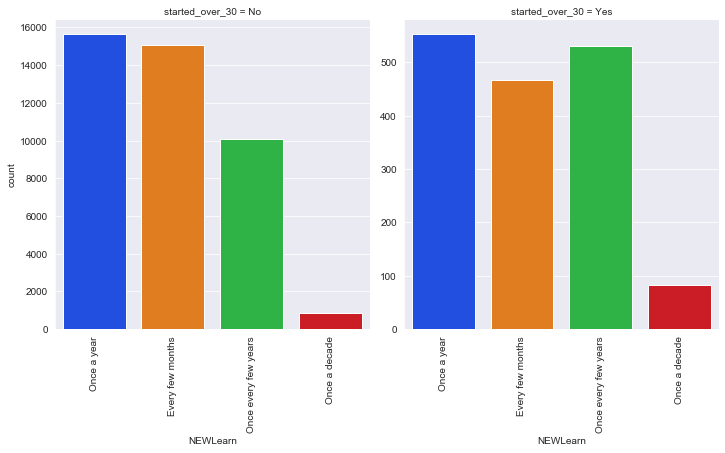

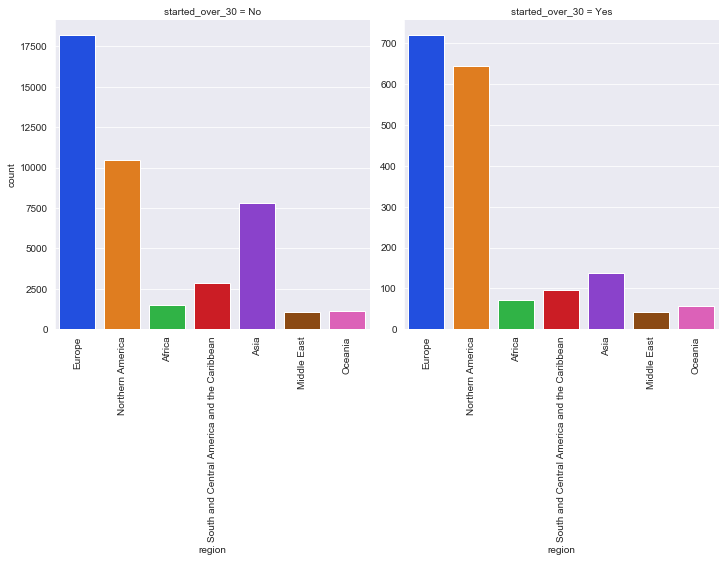

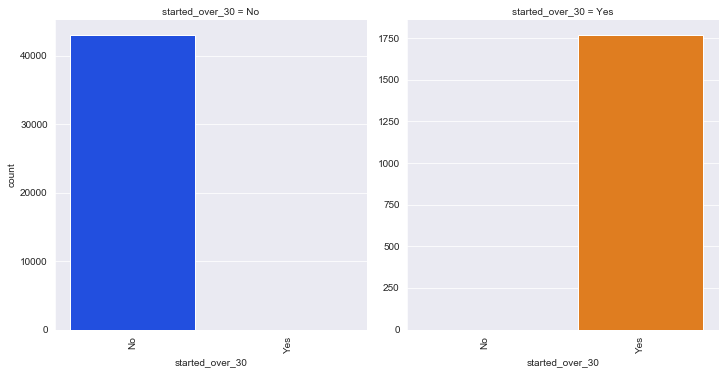

In [34]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 12:
        g = sns.catplot(x = col, kind='count', col = 'started_over_30', data=data, sharey=False)
        g.set_xticklabels(rotation=90)

Purple link reactions

In [35]:
data['NEWPurpleLink'].value_counts(normalize=True)

Hello, old friend    0.524980
Indifferent          0.178056
Amused               0.158844
Annoyed              0.138119
Name: NEWPurpleLink, dtype: float64

## Distribution of 'started_over_30' with specific features of interest

The plots herein will go into the medium article

## Main branch / Current occupation

In [60]:
data['MainBranch'].value_counts(normalize=True)

I am a developer by profession                                                   0.758626
I am a student who is learning to code                                           0.109927
I am not primarily a developer, but I write code sometimes as part of my work    0.083378
I code primarily as a hobby                                                      0.031845
I used to be a developer by profession, but no longer am                         0.016224
Name: MainBranch, dtype: float64

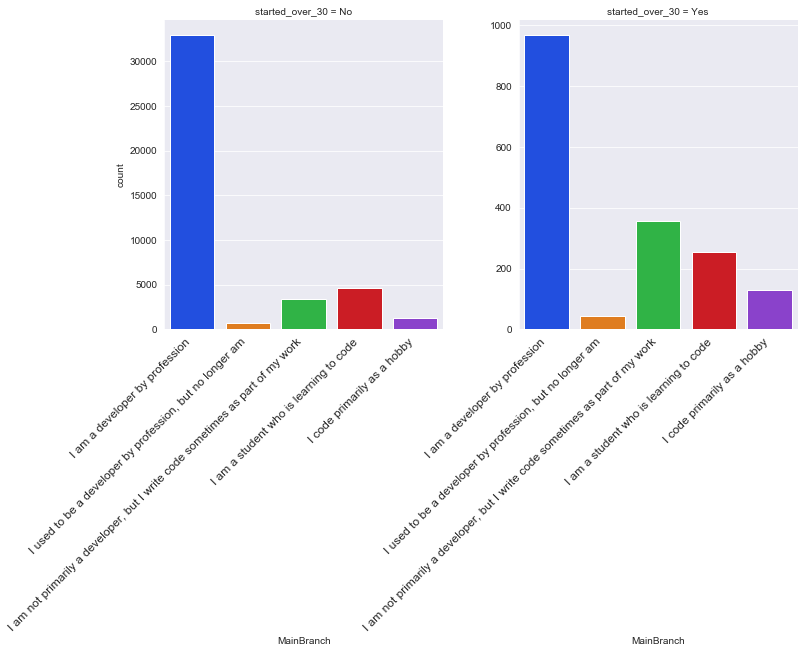

In [38]:
g = sns.catplot(x = 'MainBranch', kind='count', col = 'started_over_30', data=data, sharey=False)
g.set_xticklabels(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large' )
# plt.xticks(
#     rotation=45, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large'  
# )

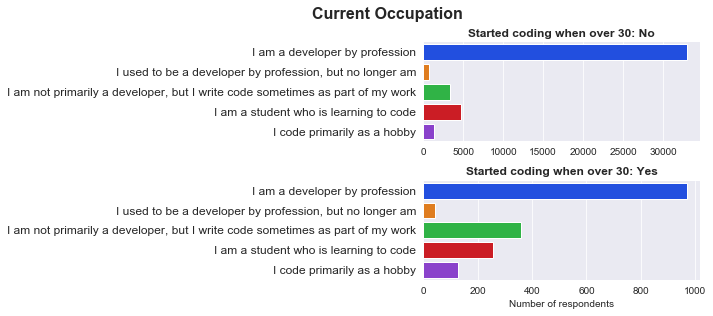

In [56]:
g = sns.catplot(y = 'MainBranch', kind='count', row = 'started_over_30', data=data, sharex=False,height=2,aspect=4.5)#, aspect=.6)
#g.set_xticklabels(rotation=80,  horizontalalignment='right',fontweight='light',fontsize='large' )
g.set_yticklabels( horizontalalignment='right',fontweight='light',fontsize=12 )
g.set_xlabels('Number of respondents',fontweight='light',fontsize=10 )
g.set_ylabels('',fontweight='light',size=12)
#g.set_xlabels('')
g.fig.suptitle('Current Occupation', y=1.04, ha='center', fontsize='16',fontweight='bold')
g.set_titles("Started coding when over 30: {row_name}", size=12,fontweight='bold')
g.fig.subplots_adjust( hspace=0.4)

## Gender

In [57]:
data['Gender'].value_counts(normalize=True)

Man               0.913529
Woman             0.073882
non-conforming    0.012589
Name: Gender, dtype: float64

98% of the respondents had entered a gender

In [59]:
data['Gender'].notnull().sum()/len(data)

0.9871271445463267

In [61]:
data.groupby('Gender')['Age1stCode'].mean()

Gender
Man               15.147056
Woman             17.074641
non-conforming    13.572711
Name: Age1stCode, dtype: float64

In [39]:
sns.set_palette(['blue', 'red', 'green'])

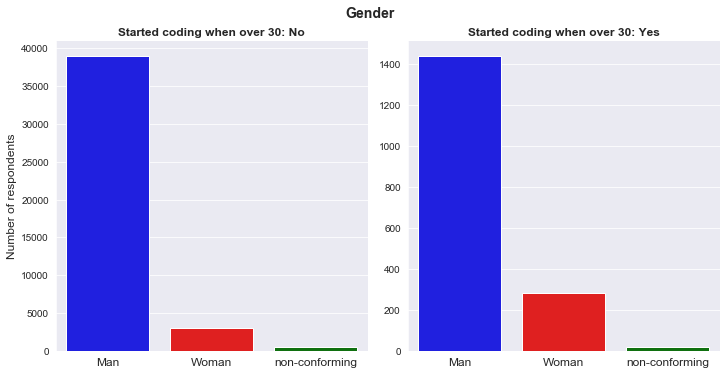

In [40]:
g = sns.catplot(x = 'Gender', kind='count', col = 'started_over_30', data=data, sharey=False)
g.set_xticklabels(rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='large' )
g.fig.suptitle('Gender', y=1.03, ha='center', fontsize='14', fontweight='bold')
g.set_xlabels('')
g.set_ylabels('Number of respondents', fontsize='12')
g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')

## Education Level

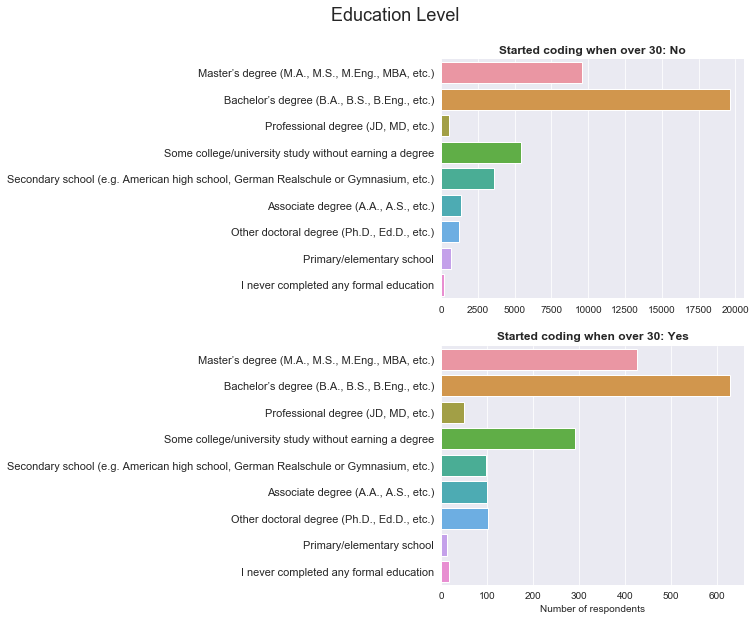

In [41]:
g = sns.catplot(y = 'EdLevel', kind='count', row = 'started_over_30', data=data, sharex=False, height=4, aspect=2.5)
#g.set_xticklabels(rotation=80,  horizontalalignment='right',fontweight='light',fontsize='large' )
g.set_yticklabels( horizontalalignment='right',fontweight='light',fontsize=11)
g.set_xlabels('Number of respondents',fontweight='light',fontsize=10 )
g.set_ylabels('',fontweight='light',size=12)
#g.set_xlabels('')
g.fig.suptitle('Education Level', y=1.05, ha='center', fontsize='18')
g.set_titles("Started coding when over 30: {row_name}", size=12,fontweight='bold')
g.fig.subplots_adjust( hspace=0.2)

## Undergraduate major

In [42]:
data[data['started_over_30'] == 'No']['UndergradMajor'].value_counts(normalize=True)

Computer science, computer engineering, or software engineering                   0.636984
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.089685
Information systems, information technology, or system administration             0.078667
A natural science (such as biology, chemistry, physics, etc.)                     0.043887
Mathematics or statistics                                                         0.036347
Web development or web design                                                     0.030904
A business discipline (such as accounting, finance, marketing, etc.)              0.023178
A humanities discipline (such as literature, history, philosophy, etc.)           0.018293
A social science (such as anthropology, psychology, political science, etc.)      0.016514
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.013169
I never declared a major                                                          0.008363

In [43]:
data[data['started_over_30'] == 'Yes']['UndergradMajor'].value_counts(normalize=True)

Computer science, computer engineering, or software engineering                   0.223900
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.143795
A business discipline (such as accounting, finance, marketing, etc.)              0.116875
A natural science (such as biology, chemistry, physics, etc.)                     0.093237
A humanities discipline (such as literature, history, philosophy, etc.)           0.086014
A social science (such as anthropology, psychology, political science, etc.)      0.082075
Information systems, information technology, or system administration             0.066973
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.060407
Web development or web design                                                     0.042679
Mathematics or statistics                                                         0.042022
A health science (such as nursing, pharmacy, radiology, etc.)                     0.024294

In [44]:
data['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   24333
Another engineering discipline (such as civil, electrical, mechanical, etc.)       3597
Information systems, information technology, or system administration              3065
A natural science (such as biology, chemistry, physics, etc.)                      1795
Mathematics or statistics                                                          1433
Web development or web design                                                      1229
A business discipline (such as accounting, finance, marketing, etc.)               1051
A humanities discipline (such as literature, history, philosophy, etc.)             820
A social science (such as anthropology, psychology, political science, etc.)        747
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      588
I never declared a major                                                            342
A health science (such as nursin

In [45]:
sns.set_palette('bright')

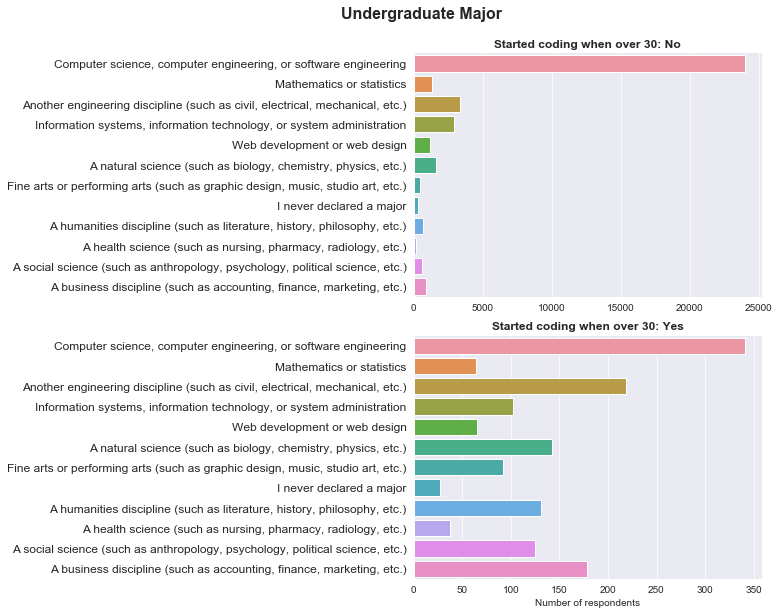

In [46]:
g = sns.catplot(y = 'UndergradMajor', kind='count', row = 'started_over_30', data=data, sharex=False,height=4,aspect=2.5)#, aspect=.6)
#g.set_xticklabels(rotation=80,  horizontalalignment='right',fontweight='light',fontsize='large' )
g.set_yticklabels( horizontalalignment='right',fontweight='light',fontsize=12 )
g.set_xlabels('Number of respondents',fontweight='light',fontsize=10 )
g.set_ylabels('',fontweight='light',size=12)
#g.set_xlabels('')
g.fig.suptitle('Undergraduate Major', y=1.04, ha='center', fontsize='16',fontweight='bold')
g.set_titles("Started coding when over 30: {row_name}", size=12,fontweight='bold')
g.fig.subplots_adjust( hspace=0.16)

## Region / Continent

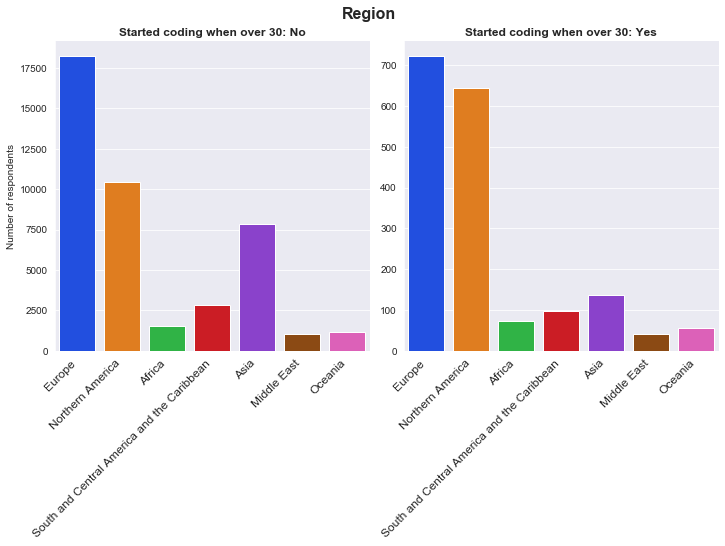

In [47]:
g = sns.catplot(x = 'region', kind='count', col = 'started_over_30', data=data, sharey=False)
g.set_xticklabels(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large' )
g.fig.suptitle('Region', y=1.03, ha='center', fontsize='16', fontweight='bold')
g.set_xlabels('')
g.set_ylabels('Number of respondents')
g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')

In [56]:
data['Country'].value_counts(normalize=True).head(30)

United States         0.210896
India                 0.096892
Germany               0.067956
United Kingdom        0.066082
Canada                0.036388
France                0.032506
Brazil                0.030498
Netherlands           0.023760
Poland                0.022355
Australia             0.020904
Spain                 0.019811
Italy                 0.018919
Russian Federation    0.017826
Sweden                0.015372
Turkey                0.011267
Switzerland           0.010999
Israel                0.010530
Pakistan              0.010396
Romania               0.009995
Austria               0.009459
Mexico                0.008857
Czech Republic        0.008478
Ukraine               0.008389
South Africa          0.008210
Belgium               0.008054
Iran                  0.007831
Nigeria               0.007563
Bangladesh            0.007117
Denmark               0.007050
Norway                0.007028
Name: Country, dtype: float64

## Job satisfaction

In [48]:
data['JobSat'].unique()

array(['Slightly dissatisfied', nan, 'Very dissatisfied',
       'Very satisfied', 'Slightly satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

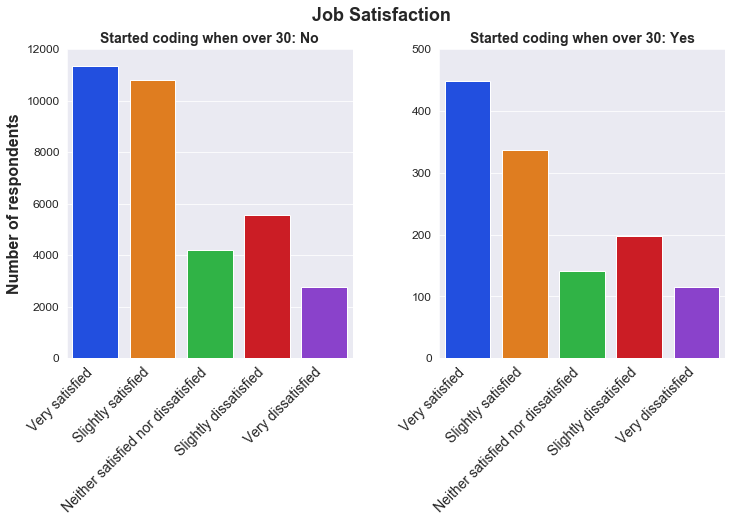

In [49]:
order_vals = ['Very satisfied', 'Slightly satisfied','Neither satisfied nor dissatisfied',
                        'Slightly dissatisfied','Very dissatisfied' ]
g = sns.catplot(x = 'JobSat', kind='count', col = 'started_over_30', data=data, sharey=False, order= order_vals)
g.set_xticklabels(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=14 )
g.set_yticklabels(fontweight='light',fontsize=12)
g.fig.suptitle('Job Satisfaction', y=1.05, ha='center', fontsize='18', fontweight='bold')
g.set_xlabels('')
g.set_ylabels('Number of respondents',fontsize='16', fontweight='bold')
g.set_titles("Started coding when over 30: {col_name}", size=14,fontweight='bold')
g.fig.subplots_adjust( wspace=0.3)

## Years_to_pro

In [79]:
#null entries proportion
data['years_to_pro'].isnull().sum()/len(data)

0.18628828949423287

In [80]:
#filled (not null)
data['years_to_pro'].notnull().sum()/len(data)

0.8137117105057672

In [81]:
data['years_to_pro'].mean()

5.821635182189565

Average years_to_pro for each group

In [82]:
data.groupby('started_over_30')['years_to_pro'].mean()

started_over_30
No     5.932587
Yes    2.751179
Name: years_to_pro, dtype: float64

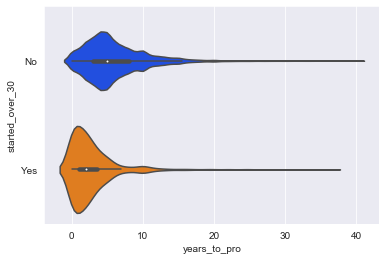

In [50]:
sns.violinplot(x='years_to_pro', y= 'started_over_30', data=data)

In [51]:
#sns.set_palette('Paired')
sns.set_palette(['#2ecc71','#e74c3c'])

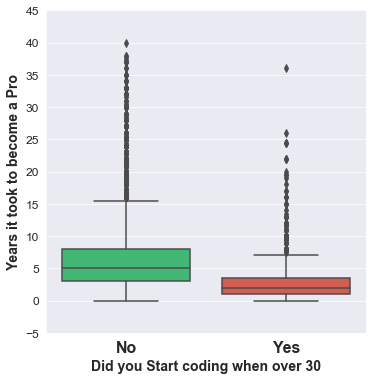

In [52]:
g = sns.catplot(y = 'years_to_pro', x= 'started_over_30', kind='box', data=data)
g.set_xticklabels(rotation=0,
    fontweight='bold',
    fontsize=16 )
g.set_yticklabels(fontweight='light', fontsize='large' )
#g.fig.suptitle('Years to become a Pro', y=1.03, ha='center', fontsize='16', fontweight='bold')
g.set_xlabels('Did you Start coding when over 30', fontweight='bold', fontsize=14)
g.set_ylabels('Years it took to become a Pro', fontweight='bold',fontsize=14)
#g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')

## Total developer types

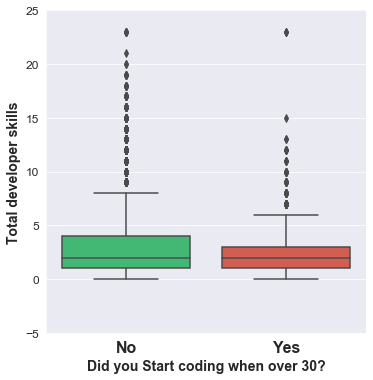

In [53]:
g = sns.catplot(y = 'total_types', x= 'started_over_30', kind='box', data=data)
g.set_xticklabels(rotation=0,
    fontweight='bold',
    fontsize=16 )
g.set_yticklabels(fontweight='light', fontsize='large' )

#g.fig.suptitle('Years to become a Pro', y=1.03, ha='center', fontsize='16', fontweight='bold')
g.set_xlabels('Did you Start coding when over 30?', fontweight='bold', fontsize=14)
g.set_ylabels('Total developer skills', fontweight='bold',fontsize=14)
#g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')

### 'Developer types' for each group:  those who started over 30 and those under 30

In [62]:
data[['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', 'Designer',
       'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
       'DevOps specialist', 'Developer, game or graphics',
       'Database administrator', 'Developer, embedded applications or devices',
       'Engineer, data', 'Educator', 'System administrator',
       'Engineering manager', 'Product manager', 'Data or business analyst',
       'Academic researcher', 'Data scientist or machine learning specialist',
       'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional']].sum(axis=0)

Developer, desktop or enterprise applications     9331
Developer, full-stack                            21627
Developer, mobile                                 7349
Designer                                          4010
Developer, front-end                             14433
Developer, back-end                              21656
Developer, QA or test                             3148
DevOps specialist                                 4847
Developer, game or graphics                       2197
Database administrator                            4509
Developer, embedded applications or devices       3637
Engineer, data                                    2856
Educator                                          2300
System administrator                              4175
Engineering manager                               2118
Product manager                                   1967
Data or business analyst                          3023
Academic researcher                               2626
Data scien

#### Separate the dataframe into 2 picking only the developer type columns: those who started under 30 and those over 30

Get the sum for each column eg how many respondents were 'Deesigners' in the under 30s dataframe

In [67]:
skills_under_30 = data[data['started_over_30'] == 'No'][['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', 'Designer',
       'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
       'DevOps specialist', 'Developer, game or graphics',
       'Database administrator', 'Developer, embedded applications or devices',
       'Engineer, data', 'Educator', 'System administrator',
       'Engineering manager', 'Product manager', 'Data or business analyst',
       'Academic researcher', 'Data scientist or machine learning specialist',
       'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional']].sum(axis=0)

In [68]:
skills_over_30 = data[data['started_over_30'] == 'Yes'][['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', 'Designer',
       'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
       'DevOps specialist', 'Developer, game or graphics',
       'Database administrator', 'Developer, embedded applications or devices',
       'Engineer, data', 'Educator', 'System administrator',
       'Engineering manager', 'Product manager', 'Data or business analyst',
       'Academic researcher', 'Data scientist or machine learning specialist',
       'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional']].sum(axis=0)

In [69]:
skills_under_30.head()

Developer, desktop or enterprise applications     9087
Developer, full-stack                            20938
Developer, mobile                                 7134
Designer                                          3793
Developer, front-end                             13860
dtype: int64

In [70]:
skills_over_30.head()

Developer, desktop or enterprise applications    244
Developer, full-stack                            689
Developer, mobile                                215
Designer                                         217
Developer, front-end                             573
dtype: int64

#### sort the values of the resulting series objects from the most popular dev type

In [71]:
skills_under_30 = skills_under_30.sort_values(ascending=False)

In [72]:
skills_over_30 = skills_over_30.sort_values(ascending=False)

In [73]:
list(skills_under_30.index)

['Developer, back-end',
 'Developer, full-stack',
 'Developer, front-end',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'DevOps specialist',
 'Database administrator',
 'System administrator',
 'Designer',
 'Developer, embedded applications or devices',
 'Developer, QA or test',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Engineer, data',
 'Academic researcher',
 'Educator',
 'Developer, game or graphics',
 'Engineering manager',
 'Product manager',
 'Scientist',
 'Engineer, site reliability',
 'Senior executive/VP',
 'Marketing or sales professional']

In [74]:
skills_under_30.index

Index(['Developer, back-end', 'Developer, full-stack', 'Developer, front-end',
       'Developer, desktop or enterprise applications', 'Developer, mobile',
       'DevOps specialist', 'Database administrator', 'System administrator',
       'Designer', 'Developer, embedded applications or devices',
       'Developer, QA or test',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Engineer, data', 'Academic researcher',
       'Educator', 'Developer, game or graphics', 'Engineering manager',
       'Product manager', 'Scientist', 'Engineer, site reliability',
       'Senior executive/VP', 'Marketing or sales professional'],
      dtype='object')

Text(0.5, 0, 'Number of early coders')

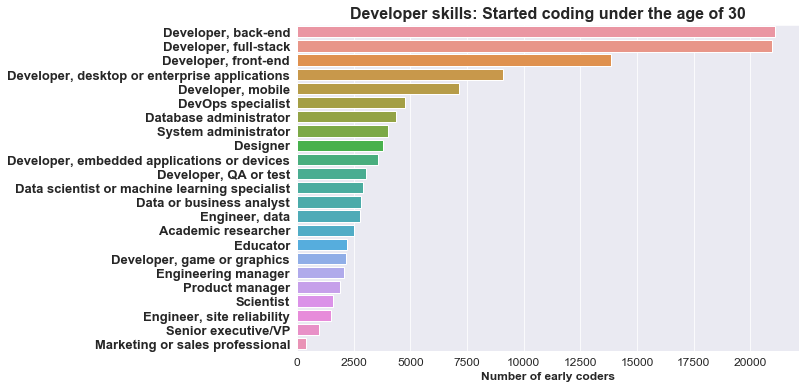

In [75]:
plt.figure(figsize=(9,6))
sns.barplot(y = skills_under_30.index, x = skills_under_30.values)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13, fontweight='bold')
plt.title('Developer skills: Started coding under the age of 30', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Number of early coders', fontsize=12, fontweight='bold')

Text(0.5, 0, 'Number of late coders')

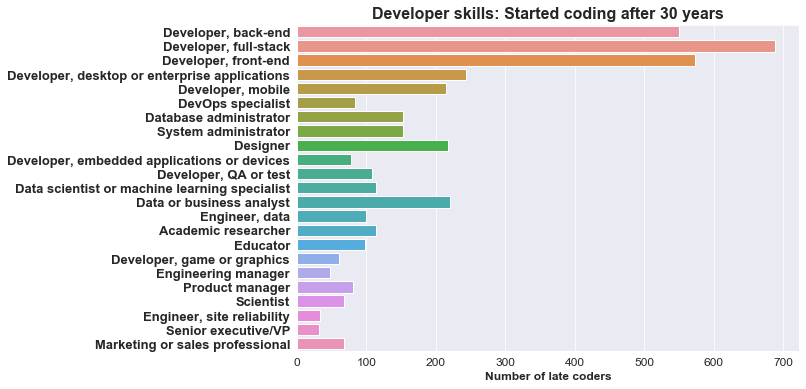

In [76]:
plt.figure(figsize=(9,6))
sns.barplot(y = skills_over_30.index, x = skills_over_30.values, order = list(skills_under_30.index))
plt.xticks(fontsize=12)
plt.yticks(fontsize=13, fontweight='bold')
plt.title('Developer skills: Started coding after 30 years', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Number of late coders', fontsize=12, fontweight='bold')

## Salary - Annual converted to USD

In [77]:
data['ConvertedComp'].mean()

102911.17092435308

In [78]:
data.groupby('started_over_30')['ConvertedComp'].mean()

started_over_30
No     102268.055909
Yes    121786.628887
Name: ConvertedComp, dtype: float64

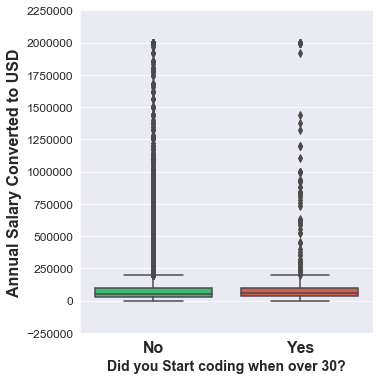

In [54]:
g = sns.catplot(y = 'ConvertedComp', x= 'started_over_30', kind='box', data=data)
g.set_xticklabels(rotation=0,
    fontweight='bold',
    fontsize=16 )
g.set_yticklabels(fontweight='light', fontsize='large' )

#g.fig.suptitle('Years to become a Pro', y=1.03, ha='center', fontsize='16', fontweight='bold')
g.set_xlabels('Did you Start coding when over 30?', fontweight='bold', fontsize=14)
g.set_ylabels('Annual Salary Converted to USD', fontweight='bold',fontsize=16)
#g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')